# Supplemental Figure S12: Quantitative analysis of reactivity of flanking WC pairs to base pair parameters

# Setup

## imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

## load data

In [4]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [5]:
df_bp_details = pd.read_csv(f"{DATA_PATH}/csvs/wc_details.csv")
df_bp_details = df_bp_details.query("flanking_pairs == 'YES'")
df_bp_details["ln_r_data"] = np.log(df_bp_details["r_data"])
df_bp_details["ln_r_data"].replace(-np.inf, -9.8, inplace=True)

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/lg/b_1r07zd7174kpbyfysdr7p0dxd870/T/ipykernel_85850/720856574.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bp_details["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


# Plotting

/Users/jyesselman2/Library/CloudStorage/Dropbox/4_papers/2024_dms_quant_framework/dms_3d_features/plotting.py:787: UserWarning: Subplots won't fit vertically! Required height: 3.60", Figure height: 2.00". Consider increasing figure height or reducing subplot height/spacing.
  warnings.warn(


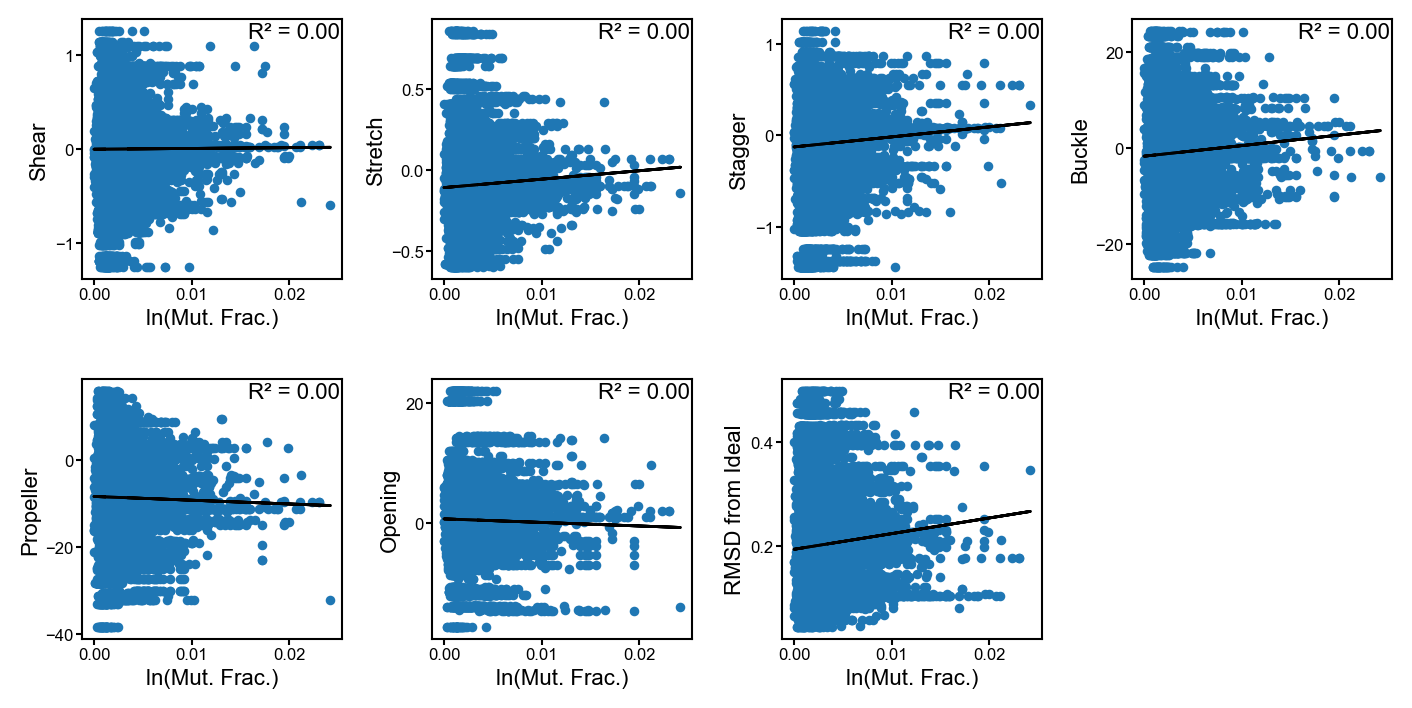

In [6]:
fig_size = (7, 2)
layout = (2, 4)
subplot_size = (1.3, 1.3)  # Each subplot is 4" x 3"
spacing = {
    "hspace": 0.45,  # horizontal spacing in inches
    "wspace": 0.50,  # vertical spacing in inches
    "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.50},
}

coords_list = calculate_subplot_coordinates(fig_size, layout, subplot_size, spacing)
fig = plt.figure(figsize=fig_size, dpi=200)

feature_columns = [
    "shear",
    "stretch",
    "stagger",
    "buckle",
    "propeller",
    "opening",
    "rmsd_from_ideal",
]

for i, feature in enumerate(feature_columns):
    ax = fig.add_axes(coords_list[i])
    scatter_plot_w_regression(df_bp_details, ax, "r_data", feature)
    ax.set_xlabel("ln(Mut. Frac.)", labelpad=2)
    if i == len(feature_columns) - 1:
        ax.set_ylabel("RMSD from Ideal", labelpad=2)
    else:
        ax.set_ylabel(feature.capitalize(), labelpad=2)
    publication_style_ax(ax)
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s12.png",
    dpi=600,
    bbox_inches="tight",
)